In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
all_data = pd.read_csv('Data/Footprint/bristol_CO2_data', encoding='latin-1').set_index('LSOA')
lsoa_data = gpd.read_file('Data/Spatial/LSOA_EW.shp').set_index('geo_code')

cen_age = pd.read_csv('Data/Census/age_data.csv')
cen_age = pd.read_csv('Data/Census/bdr_data.csv')
cen_dpr = pd.read_csv('Data/Census/dpr_data.csv')
cen_eth = pd.read_csv('Data/Census/eth_data.csv')
cen_hth = pd.read_csv('Data/Census/hth_data.csv')
cen_sex = pd.read_csv('Data/Census/sex_data.csv')

In [3]:
spatial_data = lsoa_data.join(all_data, how='right')

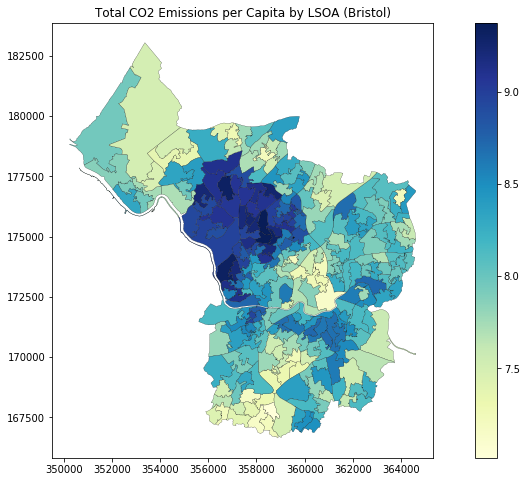

In [9]:
fig, (ax) = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

spatial_data.plot(ax=ax,
                  column='TOTAL', 
                  cmap='YlGnBu',
                  linewidth=0.2, edgecolor='black', 
                  legend=True
                 )\
            .set_title("Total CO2 Emissions per Capita by LSOA (Bristol)")

plt.savefig('total_co2.png')

In [5]:
food = ['Bread_rice_and_cereals', 'Pasta_products', 'Buns_cakes_biscuits', 'Pastry', 'Beef', 'Pork', 'Lamb', 'Poultry', 'Bacon_and_ham', 'Other_meats', 'Fish_and_fish_products', \
        'Milk', 'Cheese_and_curd', 'Eggs', 'Other_milk_products', 'Butter', 'Margarine', 'Cooking_oils_and_fats', 'Fresh_fruit', 'Other_fresh_fruits', 'Dried_fruit_and_nuts',\
        'Preserved_fruit', 'Fresh_vegetables', 'Dried_vegetables', 'Other_preserved_vegetables', 'Potatoes', 'Other_tubers', 'Sugar', 'Jams', 'Chocolate', 'Confectionery_products',\
        'Edible_ices_and_ice_cream', 'Other_food_products']

In [6]:
food_data = all_data[food]
food_data['total'] = food_data.sum(axis = 1)

C:\Users\gylk\AppData\Local\Continuum\anaconda3\envs\gds\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


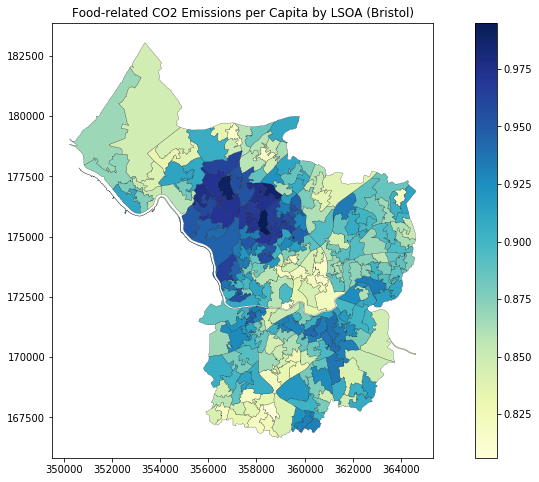

In [10]:
fig, (ax) = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

lsoa_data.join(food_data, how='right')\
         .plot(ax=ax,
               column='total', 
               cmap='YlGnBu',
               linewidth=0.2, edgecolor='black', 
               legend=True
              )\
         .set_title("Food-related CO2 Emissions per Capita by LSOA (Bristol)")

plt.savefig('food_co2.png')